In [1]:
library(dash)
library(broom)
library(rgdal)
library(dplyr)
library(plotly)
library(ggplot2)

Loading required package: sp

Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-28, (SVN revision 1158)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.1, released 2020/12/29
Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/4.1/Resources/library/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.1, January 1st, 2021, [PJ_VERSION: 721]
Path to PROJ shared files: /Library/Frameworks/R.framework/Versions/4.1/Resources/library/rgdal/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.4-6
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading sp or rgdal.
Overwritten PROJ_LIB was /Library/Frameworks/R.framework/Versions/4.1/Resources/library/rgdal/proj


Attaching package: ‘dplyr’


The fol

In [2]:
#if (!require(gpclib)) install.packages("gpclib", type="source")
#gpclibPermit()

In [26]:
df <- read.csv("map_df2.csv") %>% 
    filter(YEAR=='2019') 
head(df)

,Neighborhood,YEAR,Count,nb_lat,nb_lon
,<chr>,<int>,<int>,<dbl>,<dbl>
1,Arbutus-Ridge,2019,345,49.24680,-123.1617
2,Downtown,2019,14761,49.28075,-123.1166
3,Dunbar-Southlands,2019,470,49.23796,-123.1895
4,Fairview,2019,2594,49.26454,-123.1310
5,Grandview-Woodland,2019,2135,49.27644,-123.0667
6,Hastings-Sunrise,2019,1533,49.27793,-123.0403


In [27]:
rl_geojson <- "https://raw.githubusercontent.com/UBC-MDS/vancouver_crime_dashboard/main/data/vancouver.geojson"
geojson <- rgdal::readOGR(url_geojson)
geojson2 <- broom::tidy(geojson, region = "name")

OGR data source with driver: GeoJSON 
Source: "https://raw.githubusercontent.com/UBC-MDS/cherry_blossom_tracker/main/data/vancouver.geojson", layer: "vancouver"
with 22 features
It has 3 fields, of which 1 list fields


In [28]:
head(geojson2)

long,lat,order,hole,piece,group,id
<dbl>,<dbl>,<int>,<lgl>,<fct>,<fct>,<chr>
-123.1526,49.25723,1,FALSE,1,Arbutus-Ridge.1,Arbutus-Ridge
-123.1528,49.25183,2,FALSE,1,Arbutus-Ridge.1,Arbutus-Ridge
-123.1528,49.25169,3,FALSE,1,Arbutus-Ridge.1,Arbutus-Ridge
-123.1528,49.25155,4,FALSE,1,Arbutus-Ridge.1,Arbutus-Ridge
-123.1527,49.25142,5,FALSE,1,Arbutus-Ridge.1,Arbutus-Ridge
-123.1527,49.25128,6,FALSE,1,Arbutus-Ridge.1,Arbutus-Ridge


In [31]:
url_geojson <- "https://raw.githubusercontent.com/UBC-MDS/vancouver_crime_dashboard/main/data/vancouver.geojson"
geojson <- rgdal::readOGR(url_geojson)
geojson2 <- broom::tidy(geojson, region = "name")
geojson2 <- geojson2 %>%
    left_join(df, by = c("id" = "Neighborhood"))

OGR data source with driver: GeoJSON 
Source: "https://raw.githubusercontent.com/UBC-MDS/vancouver_crime_dashboard/main/data/vancouver.geojson", layer: "vancouver"
with 22 features
It has 3 fields, of which 1 list fields


In [32]:
head(geojson2)

long,lat,order,hole,piece,group,id,YEAR,Count,nb_lat,nb_lon
<dbl>,<dbl>,<int>,<lgl>,<fct>,<fct>,<chr>,<int>,<int>,<dbl>,<dbl>
-123.1526,49.25723,1,FALSE,1,Arbutus-Ridge.1,Arbutus-Ridge,2019,345,49.2468,-123.1617
-123.1528,49.25183,2,FALSE,1,Arbutus-Ridge.1,Arbutus-Ridge,2019,345,49.2468,-123.1617
-123.1528,49.25169,3,FALSE,1,Arbutus-Ridge.1,Arbutus-Ridge,2019,345,49.2468,-123.1617
-123.1528,49.25155,4,FALSE,1,Arbutus-Ridge.1,Arbutus-Ridge,2019,345,49.2468,-123.1617
-123.1527,49.25142,5,FALSE,1,Arbutus-Ridge.1,Arbutus-Ridge,2019,345,49.2468,-123.1617
-123.1527,49.25128,6,FALSE,1,Arbutus-Ridge.1,Arbutus-Ridge,2019,345,49.2468,-123.1617


In [35]:
options(repr.plot.width = 10, repr.plot.height = 7.5)
fig <- ggplot() +
  geom_polygon(data = geojson2, 
               aes(x = long, y = lat, group = group, fill = Count)) +
labs(title = "Number of Crimes per Neighbourhood",
    x = "Longitud",
    y= "Latitud") +
    theme(plot.title = element_text(hjust = 0.5, size = 16),
          plot.subtitle = element_text(hjust = 0.5, size = 12)) +
  scale_fill_gradient(low = "yellow2", high = "red3", na.value = NA)

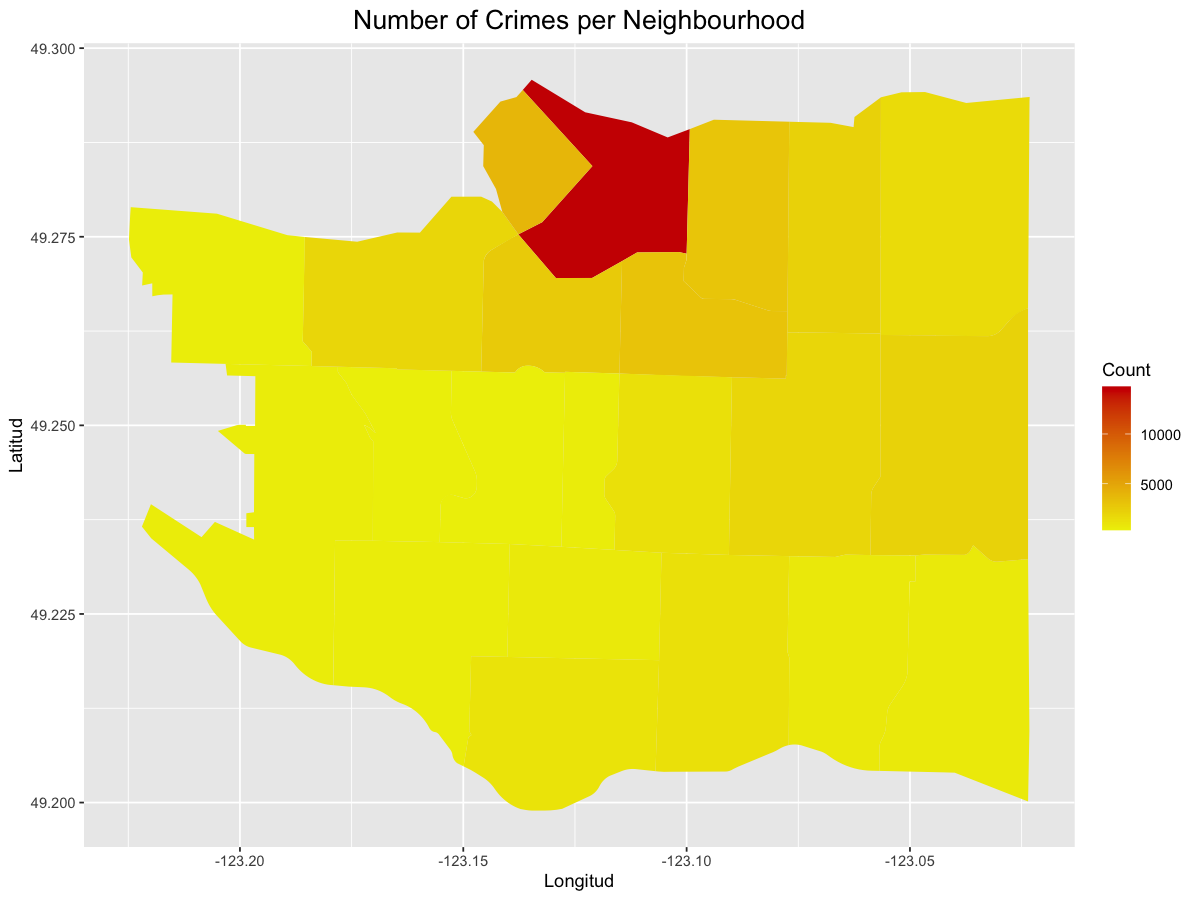

In [36]:
fig